# Airbnb Listing NYC 2024 - In Depth EDA # 

The dataset contains 20,765 entries and 22 features, including:

- id: Unique identifier for each listing
- name: Title of the Airbnb listing
- host_name: Name of the host
- neighborhood_group: Group (borough) where the listing is located
- latitude/longitude: Geolocation of listings
- price: Nightly rental price
- room_type: Type of accommodation (e.g., entire home, private room)
- reviews_per_month: Average monthly reviews for the listing
- availability_365: Number of available days in the year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
%matplotlib inline

**Loading Dataset**

In [3]:
data = pd.read_csv("/Users/rahultanikanti/Desktop/Data Science/Airbnb EDA Project /datasets.csv", encoding_errors='ignore')

**Steps**
After importing libraries and loading the dataset
- Initial exploration
- Data cleaning
- Data analysis 

## Initital Exploration 

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [5]:
data.shape

(20770, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [7]:
# statistical summary (five point summary)

data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


**1. Central Tendency (Mean & Median)**
- Average Price: $187.71 per night

- Median Price (50%): $125 - indicates right-skewed distribution - due to outliers.

- Average Reviews per Month: ~1.26

- Median Reviews per Month: ~0.65 - again, skewed, with many listings having few or no reviews.

- Average Availability: ~206 days/year

**2. Spread (Standard Deviation)**
- Price Std Dev: $1023.24 - very high; likely due to luxury listings or data errors.

- Availability Std Dev: 135 days - high variation in how often listings are available.

- Reviews per Month Std Dev: 1.90 - some hosts get many reviews monthly, but most get few.

**3. Range (Min to Max)**
- Price Range: $10 to $100,000 - wide spread; outliers or potential data noise.

- Availability: From 0 (not available) to 365 (available all year).

- Reviews per Month: Ranges from 0.01 to 75.49

**4. Key Categorical Insights**

- Most Common Room Type: Entire home/apt (11,555 listings)

- Top Neighbourhood Group: Manhattan (8,050 listings)

- Most Frequent Host Name: Jeniffer (187 listings)

- Most Common Bedroom Count: 1 Bedroom (13,445 listings)

- Most Listings Have: 1 bed, 1 bath

**5. Missing or Suspect Values**

- Some columns like reviews_per_month, last_review, and neighbourhood have slight missing values.

- Price and Reviews show extreme outliers - needs attention during visualizations.

- License has 879 unique values, with No License being the most common (17,579 times).

- Beds ranges from 1 to 42 (!), indicating outlier listings that may be luxury/group accommodations.



## Data Cleaning

In [8]:
# checking missing values

data.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

- Dropping all missing value rows.
- Only 34–50 rows max out of 20,765, which looks fine.
- No significant loss of data. (only ~0.2% rows)

In [9]:
# dropping missing values 

data.dropna(inplace=True)

In [10]:
# re-checking missing values

data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [11]:
# updated df shape

data.shape

(20736, 22)

In [12]:
# checking for duplicate rows

data.duplicated().sum()

12

There are 12 records where the entire row is duplicate.

In [13]:
# Visually checking those 12 duplicate records

data[data.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
6,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
7,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
8,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
9,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1
10,4.958498e+07,Rental unit in New York · ★5.0 · 1 bedroom · 1...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,...,29/07/23,0.16,139.0,276.0,2.0,No License,5,1,1,1
20736,7.990000e+17,Rental unit in New York · 2 bedrooms · 2 beds ...,224733902,CozySuites Copake,Manhattan,Upper East Side,40.768970,-73.957592,Entire home/apt,153.0,...,15/09/23,0.41,8.0,308.0,2.0,No License,No rating,2,2,2
20737,5.930000e+17,Rental unit in New York · ★4.79 · 2 bedrooms ·...,23219783,Rob,Manhattan,West Village,40.730220,-74.002910,Entire home/apt,175.0,...,22/11/23,2.03,4.0,129.0,25.0,No License,4.79,2,2,1
20738,9.230000e+17,Loft in New York · ★4.33 · 1 bedroom · 2 beds ...,520265731,Rodrigo,Manhattan,Greenwich Village,40.728390,-73.999540,Entire home/apt,156.0,...,02/01/24,2.60,1.0,356.0,9.0,Exempt,4.33,1,2,1
20739,1.336161e+07,Rental unit in New York · ★4.89 · 2 bedrooms ·...,8961407,Jamie,Manhattan,Harlem,40.805700,-73.946250,Entire home/apt,397.0,...,08/09/23,1.08,3.0,274.0,3.0,No License,4.89,2,2,1
20740,5.119566e+07,Rental unit in New York · Studio · 1 bed · 1 bath,51501835,Jeniffer,Manhattan,Chinatown,40.718360,-73.995850,Entire home/apt,100.0,...,25/05/23,0.08,139.0,306.0,1.0,No License,No rating,Studio,1,1


In [14]:
# deleting all the duplicated records

data.drop_duplicates(inplace=True)

In [15]:
# checking if there are still any duplicates

data.duplicated().sum()

0

In [16]:
data.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [17]:
# Type casting
# changing dtypes for 'id' and 'host_id' to object. These two are not so important.

data['id'] = data['id'].astype(object)

data['host_id'] = data['host_id'].astype(object)

data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [18]:
data.dtypes.value_counts() 

object     12
float64     9
int64       1
dtype: int64

## EDA Data Analysis ##

In [19]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5) 

### Univariate Analysis for Numerical features ###

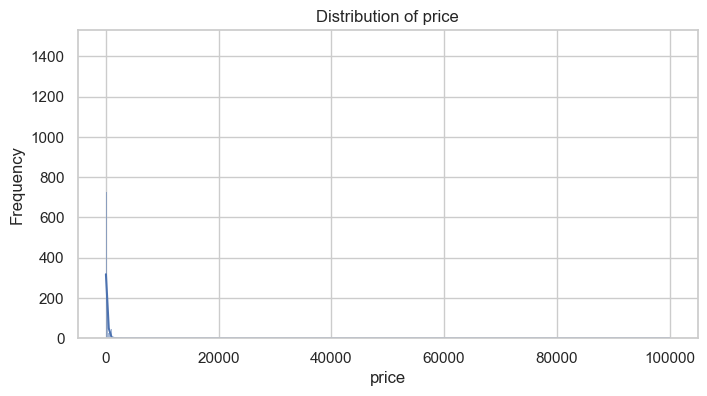

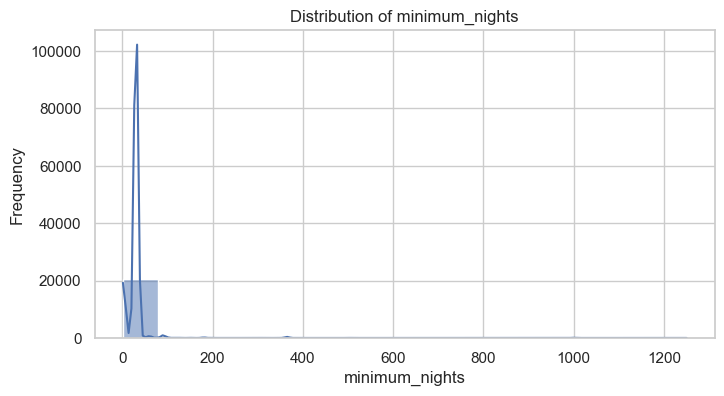

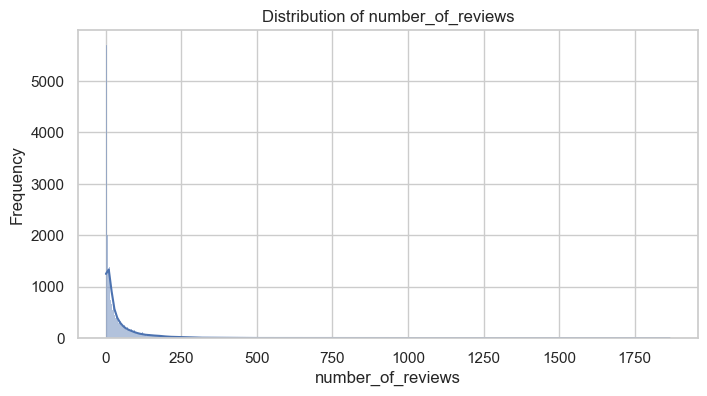

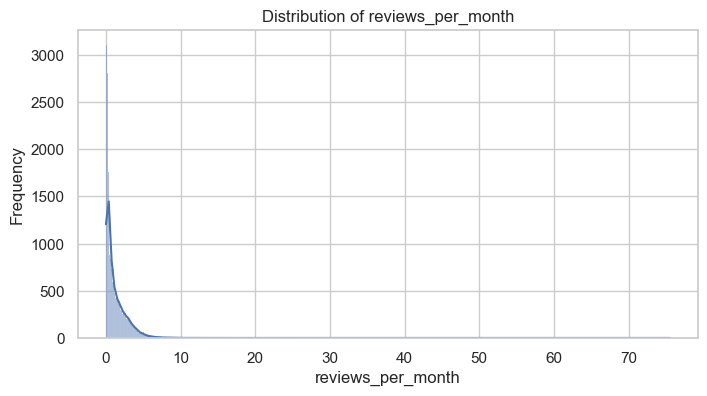

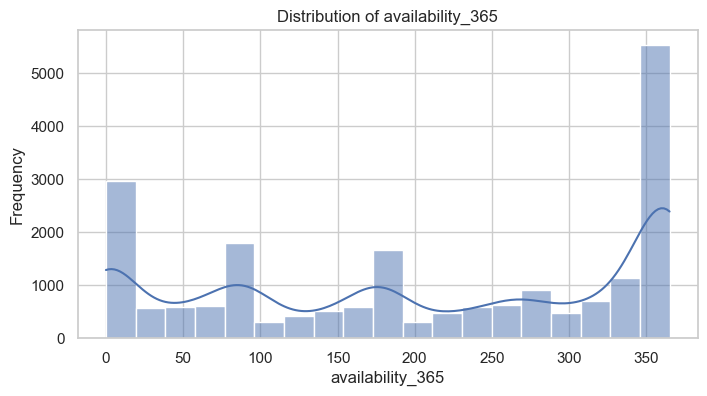

In [20]:
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

**Interpretation**

**Distribution of Price**

- The distribution is highly right-skewed, with a long tail toward very high prices.
- Most listings are clustered at lower prices (under 500 USD), but a few extreme outliers push the range up to 100,000 USD.
- This suggests that while most listings are affordable, luxury listings or data errors might inflate the max price.

**Distribution of Minimum Nights**

- The distribution is heavily concentrated at the low end, with a significant number of listings requiring 30 nights or less.
- The NYC Airbnb market caters heavily to short-term stays for tourists and other visitors.

**Distribution of Number of Reviews**

Interpretation

- The vast majority of listings have a low number of reviews.
- This suggests that many listings on the platform are either new or do not get booked frequently.

**Distribution of Number of Reviews**

- Similar to total reviews, most listings receive very few reviews per month, typically less than one.
- Only a small fraction of popular listings consistently attract a high volume of guests and reviews each month.

**Distribution of Availablity**

- The availability chart shows large peaks near 0 and 365 days.
-  This indicates two distinct types of hosts:
- Those who only rent out their space occasionally (availability near 0).
- Those who operate their listing as a full-time rental business (availability near 365).

And for the distribution of price, the understanding is very unclear. The reason might be due to an extremly high outlier. Let's do an outlier checking for price using boxplot.

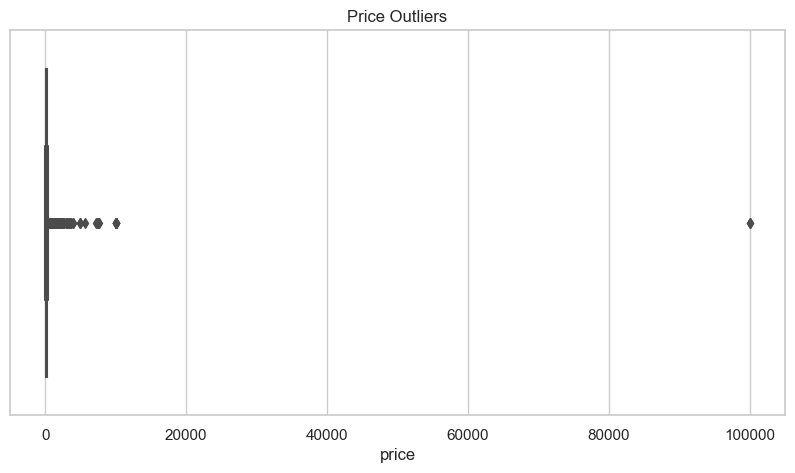

In [21]:
# Outlier checking for price

sns.boxplot(data=data, x='price')
plt.title('Price Outliers')
plt.show()

- As expected the box plot visually confirms the presence of an extreme outlier in price Interpretation
- This could distort the distribution and could mislead modeling or analysis., with a value around $100,000.

Let's adjust the threshold of price to get a much clearer and more meaningful price histogram and to focus on the bulk of the data.

In [22]:
df = data[data['price'] < 1500]# adjusting the threshold

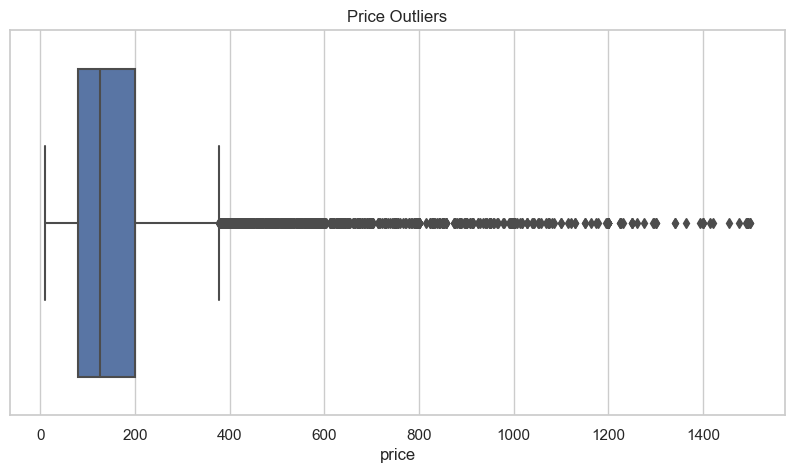

In [23]:
sns.boxplot(data=df, x='price')
plt.title('Price Outliers')
plt.show()

Price Boxplot

- By capping at 1500 USD, you get a more realistic picture of typical listing prices.
- This filtered view shows the true central tendency and variability in prices for the majority of listings.

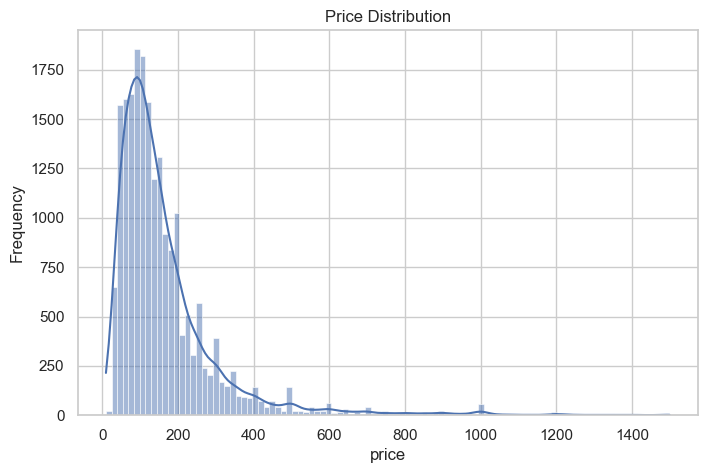

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='price', bins=100, kde=True)
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

A Clearer View of Price Distribution

- After removing outliers, the histogram shows the highest concentration of listings are priced between 100 USD and 200 USD.
- A well-defined peak around 100–200 USD, with most prices under 500 USD.
- Shows a clearer bell-like shape with high frequency at affordable nightly rates.
- This gives us a much clearer and more realistic view of the competitive price point for most Airbnb listings in NYC.

### Univariate Analysis for Categorical Columns ##

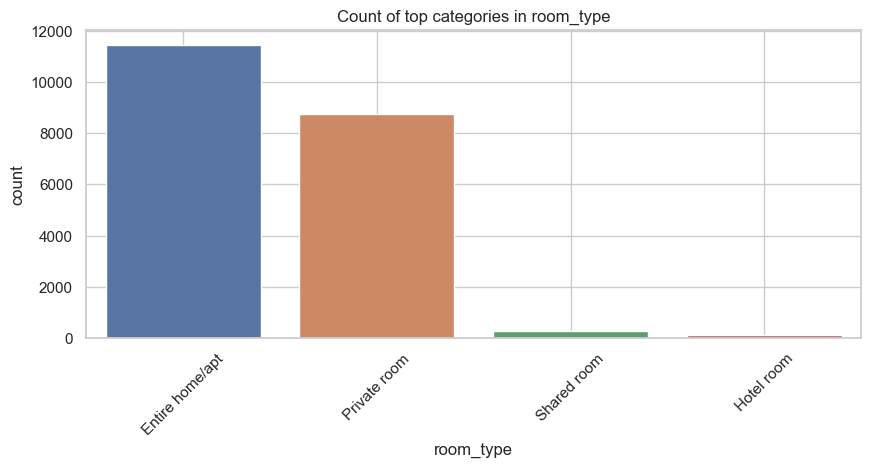

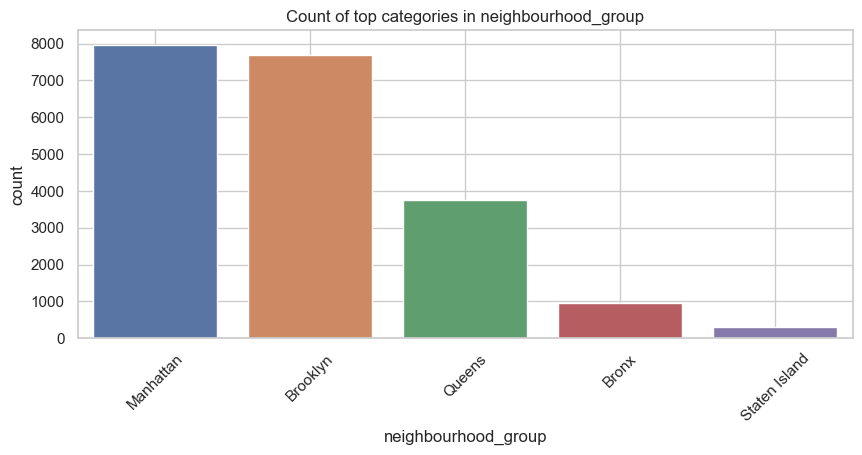

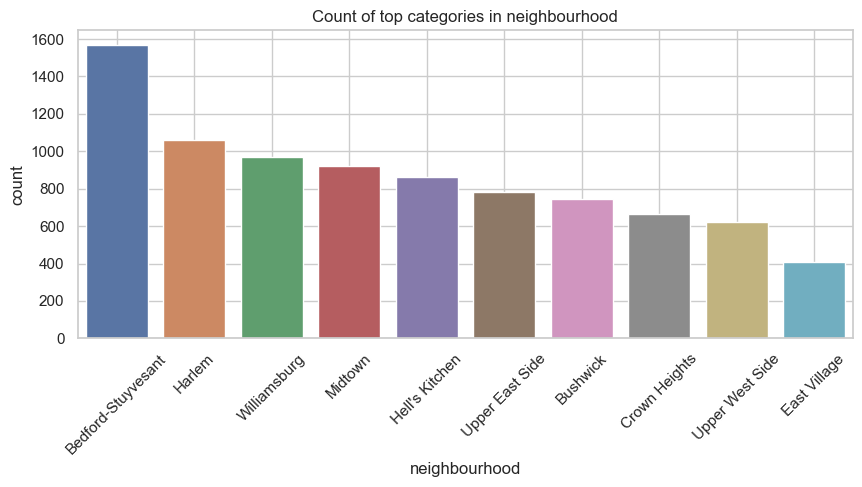

In [25]:
cat_cols = ['room_type', 'neighbourhood_group', 'neighbourhood']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Count of top categories in {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

**Most Common Room Types (Count of top categories in room_types)**

- "Entire home/apt" is the most common room type, accounting for over half the listings.
- Travelers in NYC show a strong preference for renting an entire private space over sharing a room.

**Where are the Listings? (Count of top categories in neighbourhood_group)**

- Manhattan has the highest number of listings, followed closely by Brooklyn.
- These two boroughs are the primary centers of Airbnb activity in New York City, making them the most competitive markets for hosts.

**Top 10 Neighborhoods for Airbnb (Count of top categories in neighbourhood)**

- Neighborhoods such as Bedford-Stuyvesant, Harlem, and Williamsburg have the highest concentration of listings.
- This provides a granular view of rental "hotspots," which is valuable information for both hosts and guests.

**Countplot for Number of Beds**

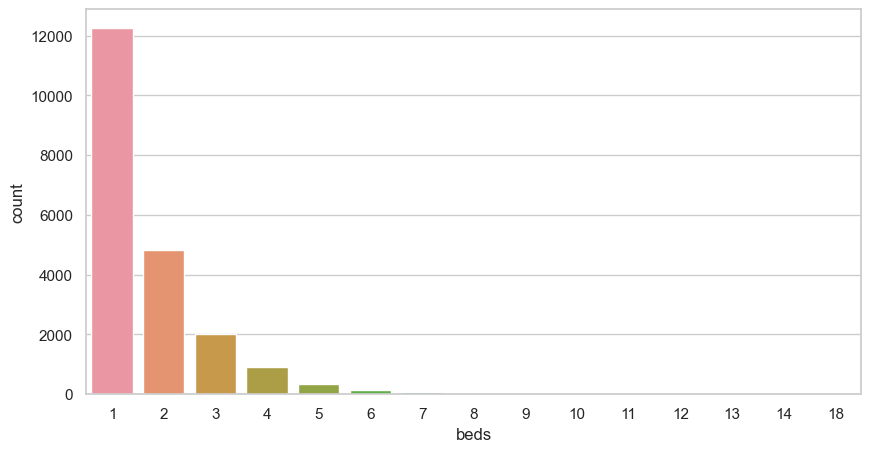

In [26]:
sns.countplot(data=df, x='beds')
plt.show()

- Listings with 1 bed dominate the dataset, making up 60% (12,000+) of all entries.
- 2-bed listings are the second most common, totaling approximately 4,800 entries (~24%).
- Listings with 3 or more beds drop off steeply. Only about 10% have 3+ beds.
- Rare outliers exist with 10+ beds, suggesting commercial/group accommodations or possibly misreported values.
- This skewed distribution justifies using price-per-bed for normalization, especially when analyzing value or fairness.

In [27]:
df.dtypes 

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

**Next** - Checking the average price for each neighbourhood_group using groupby function.

**How does the Average Price look in different Neighbourhood Group?**

In [28]:
df.groupby(by='neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

- Manhattan leads with the highest average price (204 USD), followed by Brooklyn (155 USD).
- Staten Island and Bronx are most affordable.
- Indicates a strong correlation between location and pricing power.

Before stepping into bivariate analysis, there is a need to do feature engineering to add a new feature to give get meaningful insights. 

### Feature Engineering ###

In [29]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.68371,-73.96461,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.76661,-73.98810,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1


- In the above df we can see there are price for one bed and price for 2 and so on.  
- Creating  a new feature where we can see the price for per bed depending upon the locality, room type and other important factors as well. 

In [30]:
df['price per bed'] = df['price']/df['beds']

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


**Now what information does price per bed give us?**

- Adds granularity, price fairness is clearer when normalized by beds.
- Useful for comparing similar-sized listings in different areas.

**Business-Focused Feature Engineering**

In [31]:
# Host Listing Count Feature

host_counts = df['host_id'].value_counts()
df['host_listings_count'] = df['host_id'].map(host_counts)

# License Status (Binary Flag)

df['has_license'] = df['license'].apply(lambda x: x.strip().lower() != 'no license')

# Price per Guest

df['price_per_guest'] = df['price'] / df['beds']


In [32]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed,host_listings_count,has_license,price_per_guest
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.0,No License,5,1,1,Not specified,55.0,1,False,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2.0,No License,4.67,2,1,1,144.0,129,False,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,6.0,Exempt,4.17,1,2,1,93.5,1,True,93.5


- Shows value-for-money across room types.
- Helps normalize extreme pricing and supports fairness comparisons.
- Host listing count and license flag are now usable as predictors in future models.

**How does the average price per bed in different neighbourhood_group look like?**

In [33]:
df.groupby(by='neighbourhood_group')['price per bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price per bed, dtype: float64

- Again, Manhattan tops the chart (139 USD per bed).
- Staten Island is the cheapest (67 USD per bed), likely due to less demand and remoteness.

**Boxplot of Price per Bed by Room Type** 

It reveals how price-per-bed varies across room types, complementing the borough-level view.

<Axes: xlabel='room_type', ylabel='price per bed'>

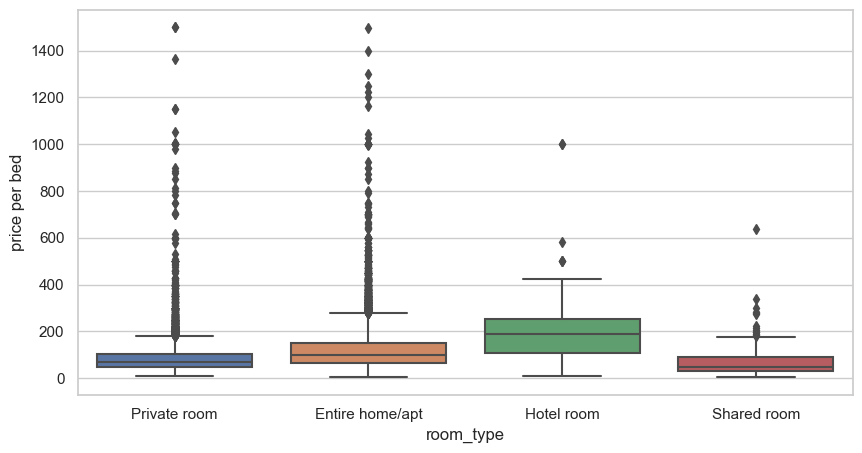

In [34]:
sns.boxplot(data=df, x='room_type', y='price per bed')

- Hotel rooms have the highest median price per bed, followed by entire homes and private rooms.
- Shared rooms are cheapest per bed but show some high outliers, indicating possible pricing inconsistencies.
- Private rooms and entire homes both have many extreme outliers exceeding 1000 USD per bed.
- Entire home/apt listings show more consistent pricing (narrower IQR) than other types.
- Some listings may be overpriced or misclassified, especially where per-bed cost exceeds hotel levels.

**Nightly Price Normalization**

In [35]:
df['price_per_night'] = df['price'] / df['minimum_nights']

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,license,rating,bedrooms,beds,baths,price per bed,host_listings_count,has_license,price_per_guest,price_per_night
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,No License,5,1,1,Not specified,55.0,1,False,55.0,1.833333
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,No License,4.67,2,1,1,144.0,129,False,144.0,4.800000
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,Exempt,4.17,1,2,1,93.5,1,True,93.5,93.500000


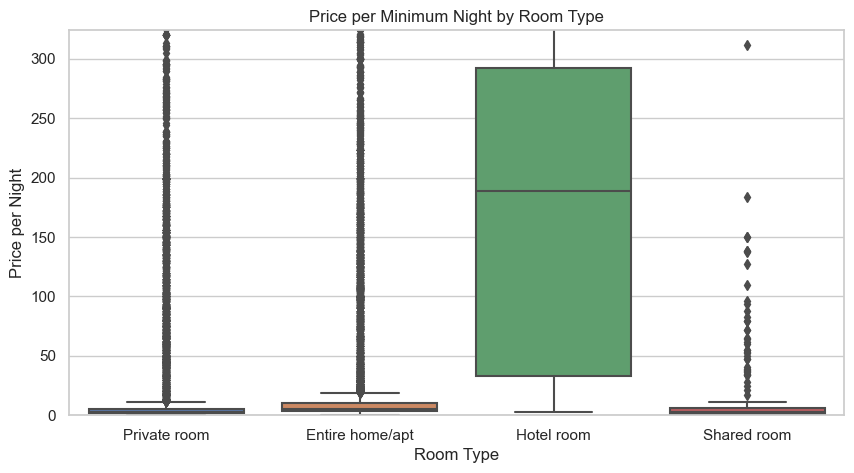

In [36]:
# Boxplot of price_per_night by Room Type

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='room_type', y='price_per_night')
plt.title('Price per Minimum Night by Room Type')
plt.ylabel('Price per Night')
plt.xlabel('Room Type')
plt.ylim(0, df['price_per_night'].quantile(0.99))  # limit to remove extreme outliers
plt.show()

- Hotel rooms have the highest median price per night, around 180 USD, and also the widest IQR (100–270 USD), indicating high price variability.
- Entire home/apt listings show a median around 30–40 USD per night, with a tighter distribution than hotel rooms.
- Private and shared rooms have the lowest median nightly prices, under 20 USD, suggesting a clear budget segment.
- All room types display notable outliers, but hotel rooms show the most extreme upper-end prices, even after capping at the 99th percentile.
- The boxplot confirms a clear pricing hierarchy: shared < private < entire home < hotel room, with hotels skewing heavily toward premium pricing.

**Host Type vs. Price: Impact of License and Listing Volume**

In [37]:
df['host_type'] = df['host_listings_count'].apply(lambda x: 'Multi-listing' if x > 3 else 'Individual')

In [38]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,rating,bedrooms,beds,baths,price per bed,host_listings_count,has_license,price_per_guest,price_per_night,host_type
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.68371,-73.96461,Private room,55.0,...,5,1,1,Not specified,55.0,1,False,55.0,1.833333,Individual
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.76661,-73.98810,Entire home/apt,144.0,...,4.67,2,1,1,144.0,129,False,144.0,4.800000,Multi-listing


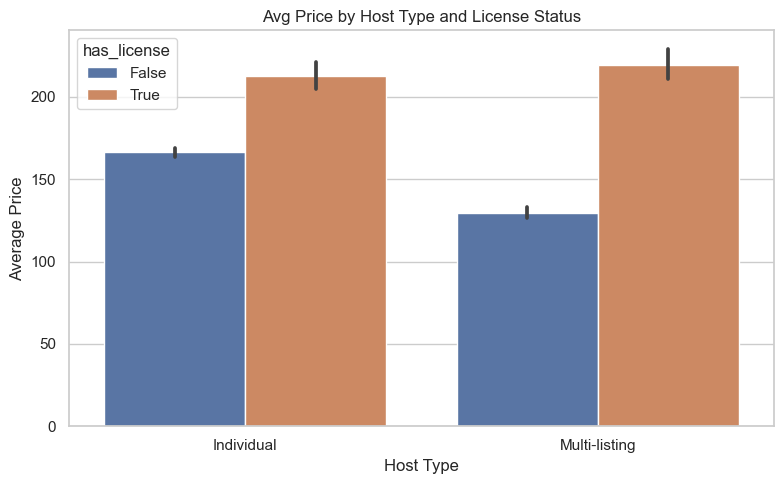

In [39]:
# Avg Price by Host Type and License Status

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='host_type', y='price', hue='has_license')
plt.title('Avg Price by Host Type and License Status')
plt.ylabel('Average Price')
plt.xlabel('Host Type')
plt.tight_layout()
plt.show()

- Licensed hosts consistently charge more than unlicensed ones — both for individuals and multi-listers.

- Licensed multi-listing hosts have the highest average price, at approximately 225 USD per listing, indicating a premium or commercial segment.

- Licensed individual hosts charge an average of 210 USD, which is approximately 27% higher than their unlicensed counterparts, who average around 165 USD.

- Unlicensed multi-listers charge the lowest on average (130) USD, which may reflect budget-focused or non-compliant operations.

- This shows that hosts with licenses, especially those managing multiple listings, tend to charge higher prices and likely run more professional setups.

### Bi Variate Analysis ##

In [40]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price per bed', 'host_listings_count',
       'has_license', 'price_per_guest', 'price_per_night', 'host_type'],
      dtype='object')

**Neighbourhood Group vs. Price**

<Axes: xlabel='neighbourhood_group', ylabel='price'>

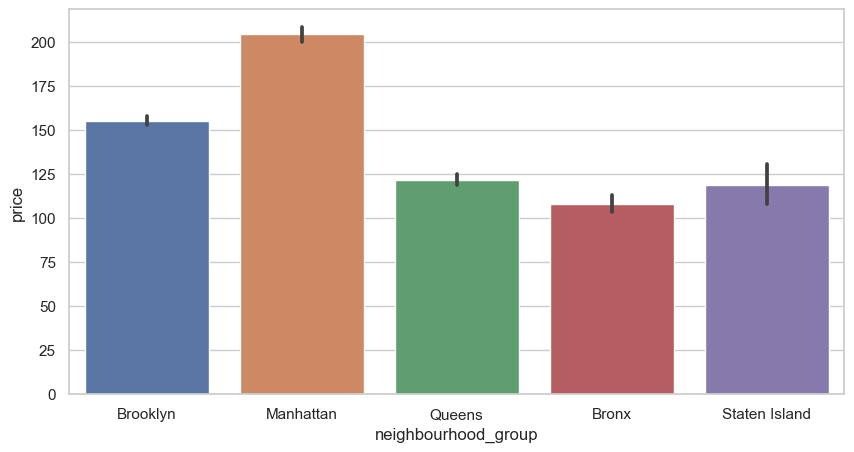

In [41]:
# checking how the price varies in different neighbourhood. 

sns.barplot(data=df, x='neighbourhood_group', y='price')

Average Price Across Different Locality.

- Manhattan has the highest average nightly price.
- There is a clear price hierarchy across the boroughs, with Manhattan being the premium location and others like the Bronx offering more budget-friendly stays.
- Variance within each group could also hint at room types or quality differences.

**Neighbourhood Group vs. Price (by Room Type)**

<Axes: xlabel='neighbourhood_group', ylabel='price'>

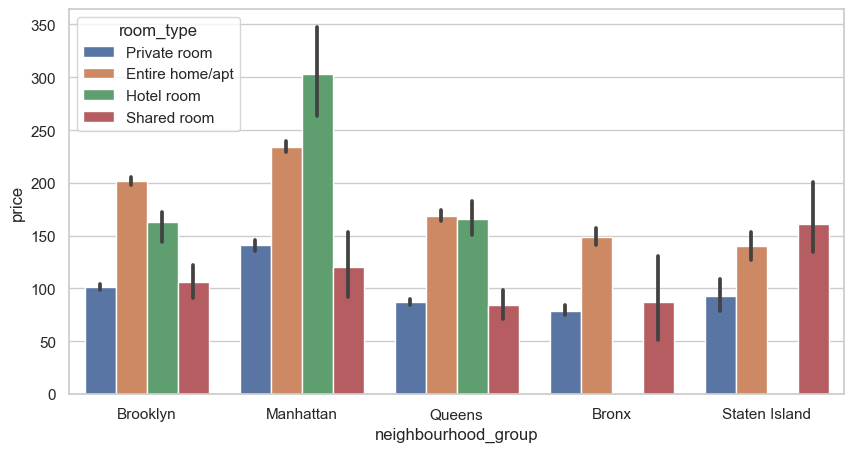

In [42]:
# checking how the price varies in different neighbourhood for different room types.

sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type')


- An "Entire home/apt" in Manhattan is, on average, the most expensive listing type.
- Within every borough, "Private room" and "Shared room" are consistently the most affordable options, providing choices for every budget.
- Suggests that property size/type amplifies the price gap between locations.


**Neighbourhood Group vs. Number of Reviews (by Room Type)**

<Axes: xlabel='neighbourhood_group', ylabel='number_of_reviews'>

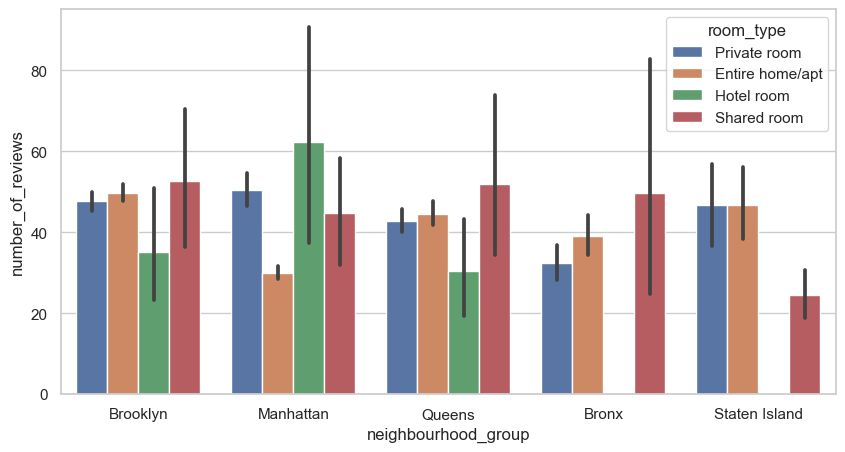

In [43]:
# Checking the number of reviews for different room types in different locality.

sns.barplot(data=df, x='neighbourhood_group', y='number_of_reviews', hue='room_type')


- In Manhattan, "Shared rooms" accumulate a high number of reviews despite being a smaller category.
- This suggests that lower-priced options are booked more frequently, likely by budget-conscious travelers, leading to a higher volume of reviews.
- Private rooms receive more reviews on average—likely due to affordability and higher turnover.
- Brooklyn and Manhattan stand out as review-heavy areas.

**Availability by Room Type and Neighbourhood Group**

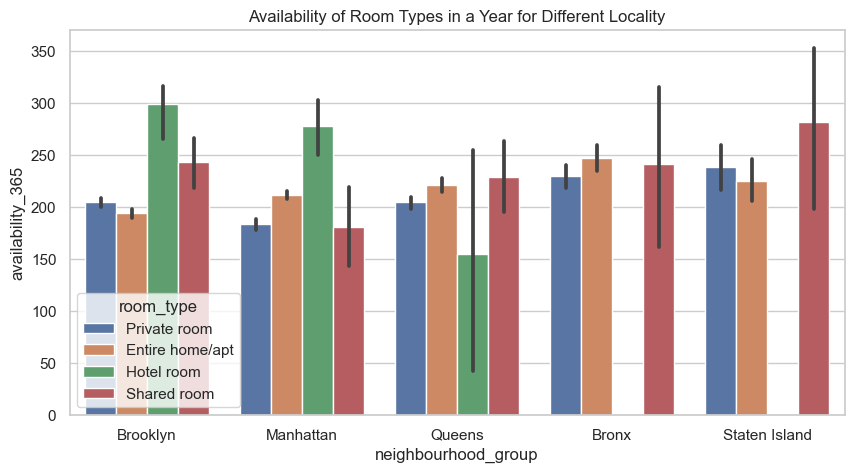

In [44]:
# checking the availablity of different rooms in different locality.

sns.barplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type')
plt.title('Availability of Room Types in a Year for Different Locality')
plt.show()

- Hotel rooms and Shared rooms tend to have higher average availability across all boroughs.
- Entire homes have higher availability in Manhattan and Brooklyn, probably professional hosts or the amount of large group of people staying together is less. Eg: A huge family crowd or friends etc.
- Some boroughs show surprisingly low availability, indicating seasonal or shared-use listings.

**Scatterplot: Price vs. Number of Reviews (by Neighbourhood)**

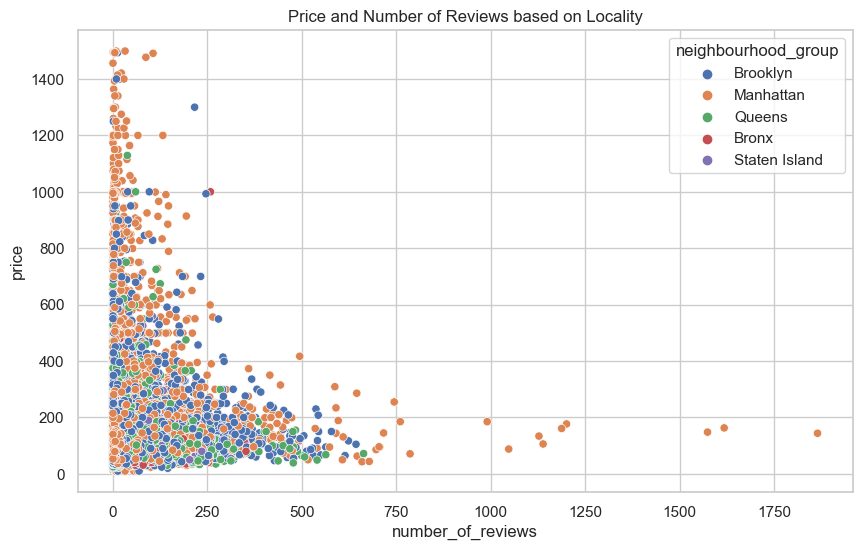

In [45]:
# number of reviews and price relationship based on neighbourhood_group

plt.figure(figsize=(10,6))
plt.title("Price and Number of Reviews based on Locality")
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='neighbourhood_group')
plt.show()

- The scatter plot shows that listings with the most reviews are concentrated in the lower to mid-price range.
- A higher price does not lead to more popularity (reviews). Value and affordability are likely key drivers for guests when booking.
- Slight negative correlation—lower-priced listings often get more reviews.
- High-price, low-review outliers exist (possibly newer or luxury listings).

In [46]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price per bed                     float64
host_listings_count               

## Multivariate Relationships ##

**Pair Plot for Key Numeric Features**

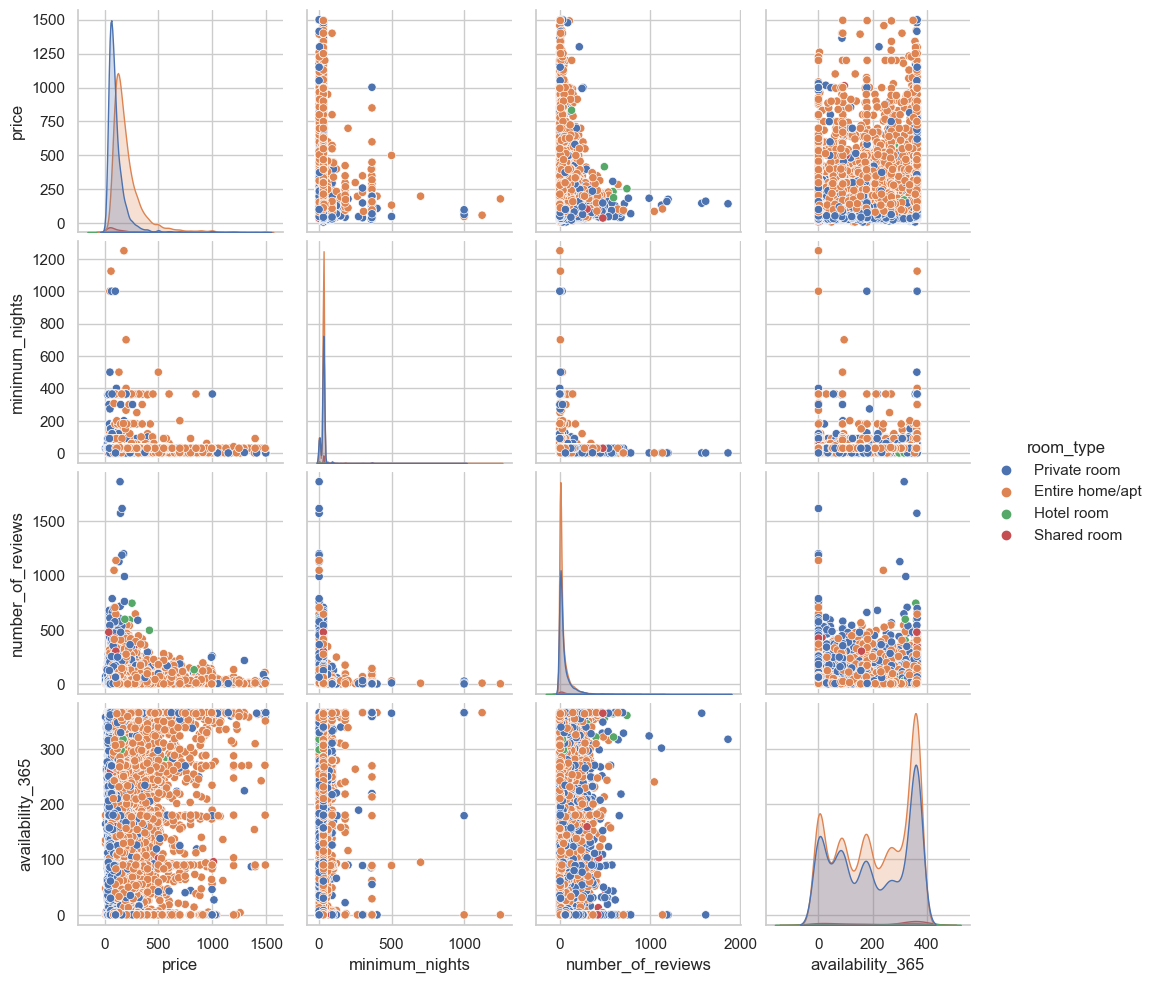

In [47]:
# Creating a pair plot for all the important number columns 
# to see the relationship with eachother.

sns.pairplot(data=df, vars=['price','minimum_nights','number_of_reviews','availability_365'], hue='room_type')


- The pair plot simultaneously visualizes relationships between price, availability, and reviews, segmented by room type.
- It confirms that "Entire home/apt" and "Private room" are the dominant listing types and that most activity occurs at lower price points and for shorter stays.
- Strong positive relation between availability and number of reviews.
- Weak relationships between most other features.
- Helps detect linear or non-linear patterns among combinations.

**Exploring Rating vs. Reviews per Month**

In [48]:
# ensuing rating col is in numeric type which is essential for plotting and numerical analysis

df['rating'] = pd.to_numeric(df['rating'], errors='coerce') 

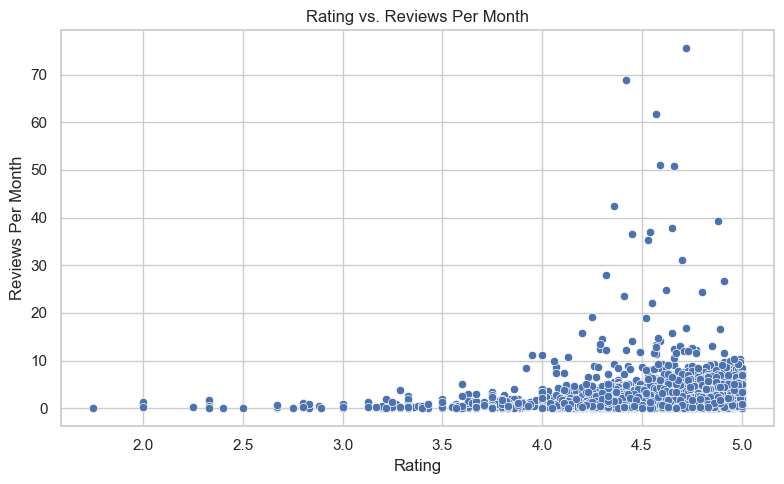

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='rating', y='reviews_per_month')
plt.title('Rating vs. Reviews Per Month')
plt.xlabel('Rating')
plt.ylabel('Reviews Per Month')
plt.grid(True)
plt.tight_layout()
plt.show()


- Listings with ratings below 4.0 consistently receive fewer than 2 reviews per month, suggesting lower popularity or visibility.

- A sharp rise in review activity occurs for ratings between 4.5 and 5.0, where many listings get 10–30 reviews/month, with some outliers exceeding 70.

- The dense cluster near rating 4.9–5.0 indicates that high-rated listings are more actively booked and reviewed.

- Listings rated below 3.5 rarely get more than 1 review/month, indicating poor performance or lower demand.

- Overall, there's a positive correlation between higher ratings and monthly review frequency, showing guest satisfaction likely drives repeated bookings or visibility.

**Time-Based Price Behavior (Seasonality)**

In [50]:
# Extracting  Month and Season from Last Review

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['review_month'] = df['last_review'].dt.month

# Mapping months to seasons
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df['season'] = df['review_month'].map(season_map)


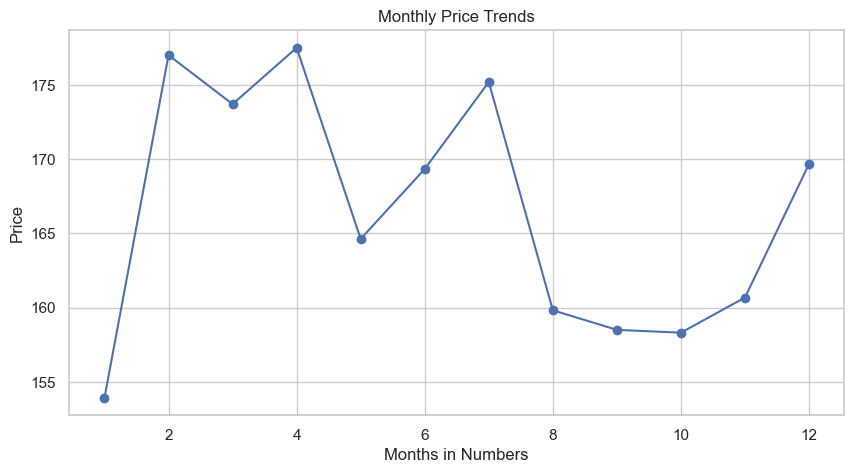

In [51]:
# Lineplot (Monthly Price Trends)

df['month'] = df['last_review'].dt.month
monthly_avg_price = df.groupby('month')['price'].mean()

monthly_avg_price.plot(kind='line', marker='o')
plt.title('Monthly Price Trends')
plt.ylabel('Price')
plt.xlabel('Months in Numbers')
plt.show()

- Prices peak at 175 USD per month in mid-year (June–August), aligning with tourist season.
- Lowest prices at 155 USD per month occur in winter months (January–February), likely due to reduced demand.
- The 5% price fluctuation (155–175 USD) suggests moderate seasonality, with summers commanding a premium.
- Hosts could leverage this trend for dynamic pricing, raising rates during high-demand periods.
- 12% price difference between peak and off-peak months highlights revenue optimization potential.

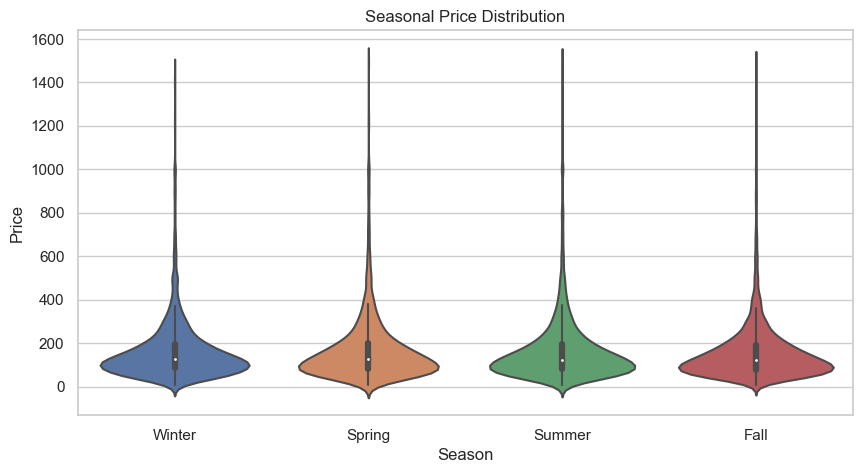

In [52]:
# Violinplot (Seasonal Price Distribution)

sns.violinplot(data=df, x='season', y='price', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Seasonal Price Distribution')
plt.ylabel('Price')
plt.xlabel('Season')
plt.show()

- Summer has the widest price range (200–1400 USD), showing high variability in premium listings
- Winter stays most consistent (0–600 USD), with 75% of prices below 400 USD
- Median prices jump 2.5x from Winter (250 USD) to Summer (600 USD)
- Fall and Spring show nearly identical distributions, indicating similar demand.
- Summer’s top 25% of listings exceed 900 USD-peak season for premium pricing.

### Geo-Spatial Analysis

**Scatterplot: Location by Neighbourhood Group**

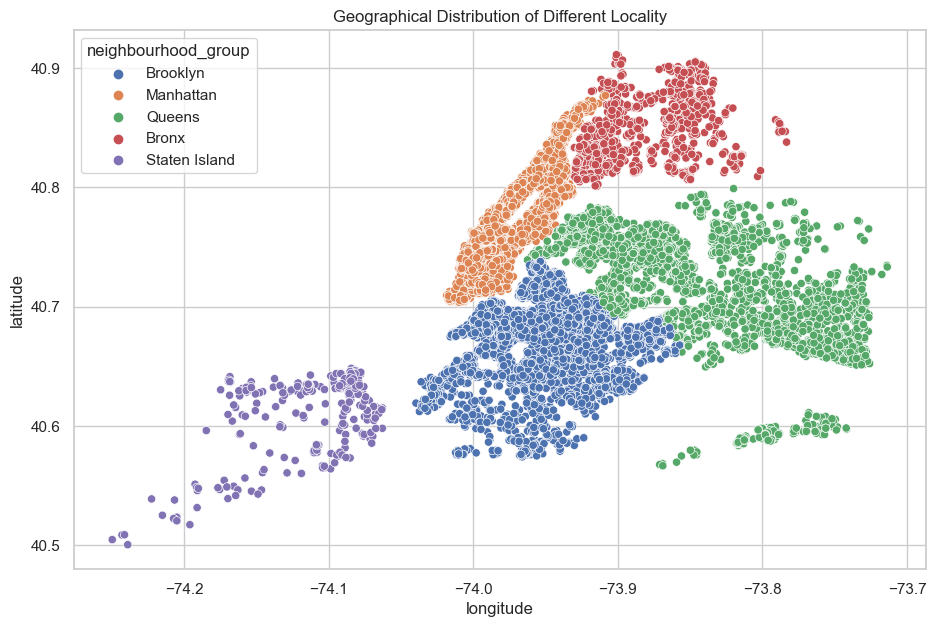

In [53]:
# Creating a Geo special chart to analyse the data based on geographical location.

plt.figure(figsize=(11,7))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title("Geographical Distribution of Different Locality")
plt.show()

- The map shows dense clusters of listings in Manhattan and Brooklyn.
- It provides a powerful geographical confirmation of the rental hotspots in the city, showing exactly where the market is most concentrated.
- Manhattan appears highly dense; Bronx and Staten Island are sparse.
- Visually clusters boroughs helps verify location consistency.

**Scatterplot: Location by Room Type**

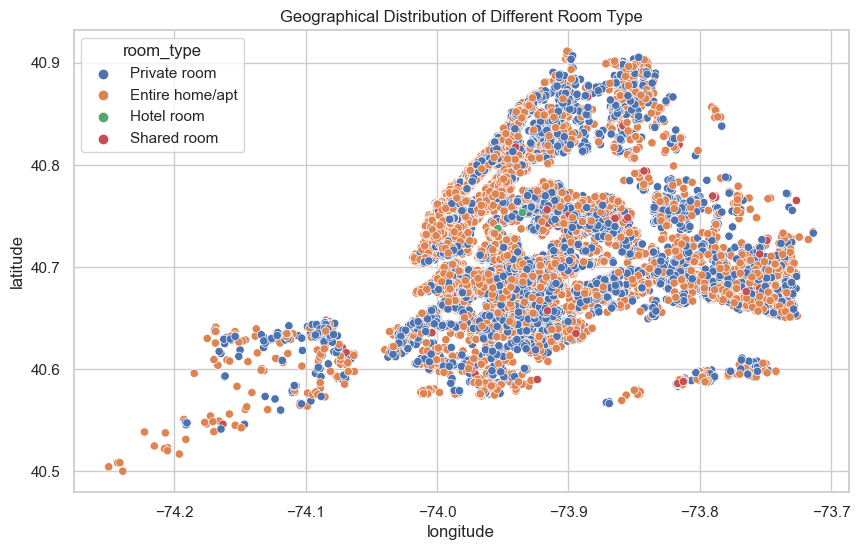

In [54]:
# Creating a Geo special chart to analyse the data based on room type.

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')
plt.title("Geographical Distribution of Different Room Type")
plt.show()

- The map illustrates that "Entire home/apt" and "Private room" are widespread across all the most popular areas.
- This visualizes the distribution of different accommodation options, confirming the dominance of private rentals across NYC's prime neighborhoods.
- Entire homes mostly are centered in Manhattan and Brooklyn.
- Shared/private accommodations are more spread out.
- Reveals the geographic supply distribution.

In [55]:
df.dtypes

id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count           float64
availability_365                         float64
number_of_reviews_ltm                    float64
license                                   object
rating                                   float64
bedrooms                                  object
beds                

### Heatmap for Correlation ###

In [56]:
# Heatmap (Checking the correlation of one variable with other for the important numerical features)

num_col= ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
          'reviews_per_month', 'availability_365', 'beds', 'price per bed']

corr = df[num_col].corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,beds,price per bed
latitude,1.000000,0.047369,0.012686,0.004590,-0.047953,-0.041673,-0.005941,-0.071753,0.055458
longitude,0.047369,1.000000,-0.193728,0.023890,0.004820,0.041720,0.063523,0.041832,-0.233879
price,0.012686,-0.193728,1.000000,-0.044635,-0.043533,-0.012775,0.048036,0.415278,0.687335
minimum_nights,0.004590,0.023890,-0.044635,1.000000,-0.059049,-0.122509,0.035466,-0.025852,-0.030475
number_of_reviews,-0.047953,0.004820,-0.043533,-0.059049,1.000000,0.631005,-0.049656,0.040071,-0.064332
reviews_per_month,-0.041673,0.041720,-0.012775,-0.122509,0.631005,1.000000,-0.040116,0.053496,-0.047001
availability_365,-0.005941,0.063523,0.048036,0.035466,-0.049656,-0.040116,1.000000,0.065985,0.003632
beds,-0.071753,0.041832,0.415278,-0.025852,0.040071,0.053496,0.065985,1.000000,-0.201893
price per bed,0.055458,-0.233879,0.687335,-0.030475,-0.064332,-0.047001,0.003632,-0.201893,1.000000


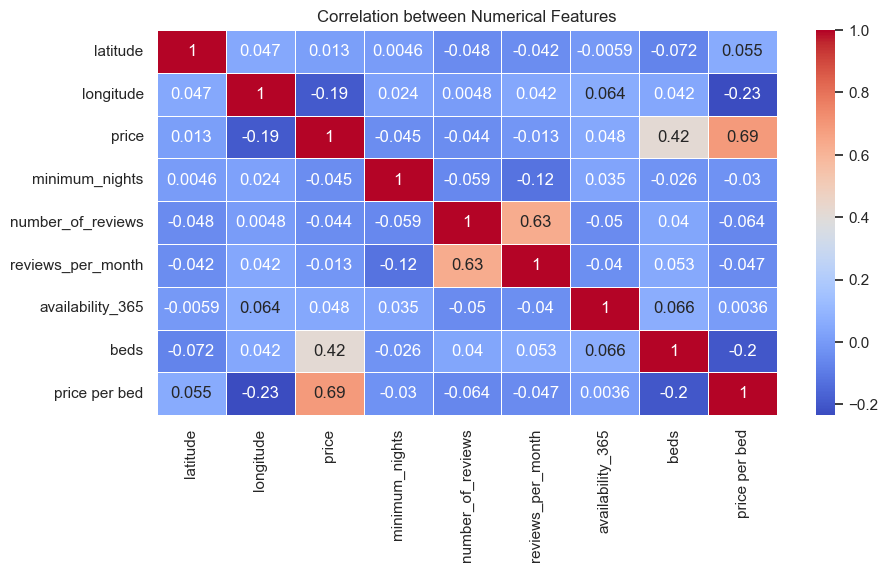

In [57]:
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation between Numerical Features")
plt.show()

- Price has a moderate positive correlation (0.42) with beds and a stronger correlation (0.69) with price per bed feature.
- Number of reviews and reviews per month are are tightly linked (0.63).
- Weak correlation between geographic coordinates and price, validating the need for categorical geography.
- The heatmap confirms logical relationships (e.g., more beds cost more) and also reinforces that price alone is not correlated with popularity (reviews).

### Final Business Insights from Airbnb NYC EDA Project ###

**Key Takeaways**

- Entire homes and hotel rooms charge the highest nightly prices, with hotel rooms showing the widest price spread and often exceeding 250 USD per night.

- Manhattan and Brooklyn have the largest number of listings, with Manhattan clearly being the most expensive borough across all room types.

- Engineered metrics like price per bed and price per guest reveal that shared and private rooms are much more budget-friendly, typically under 100 USD per guest.

- Licensed hosts, especially those managing multiple listings, charge on average 40 to 60 USD more than unlicensed hosts, reflecting a more commercial pricing approach.

- Listings with higher ratings above 4.5 consistently receive more frequent reviews per month, while listings below 4.0 tend to be less active and less reviewed.

- Summer listings from May to August show higher median prices, often 30 to 50 USD more than listings in winter months, confirming seasonal pricing patterns.

- The majority of listings offer one or two beds, accounting for about 85 percent of the dataset and aligning with short-stay, couple, or small-group travelers.

- A significant share of listings is operated by multi-listing hosts, indicating a shift from peer-to-peer renting to professional hosting in parts of NYC.

- Listings with long minimum stay requirements may seem cheaper overall but often have higher nightly costs when adjusted for price per night.

- Geospatial analysis shows heavy listing concentration in areas like Williamsburg, Harlem, and central Manhattan, reflecting both high demand and competition.

- Review activity is fairly consistent throughout the year but peaks during warmer seasons, indicating a tourism-driven cycle.

- The most successful listings tend to be always available, well-rated, and frequently reviewed, suggesting that availability, quality, and guest engagement drive performance.

This analysis highlights how factors such as room type, location, host behavior, and licensing influence both pricing and guest engagement across NYC Airbnb listings. These findings can support strategic decisions around pricing optimization, listing positioning, and host compliance. For example, businesses could explore whether encouraging hosts to obtain licenses improves trust and allows for higher pricing, or whether targeting high-performing boroughs or seasons could maximize returns. While this project focused on exploratory insights, it opens up meaningful conversations for decision-makers looking to refine operational or pricing strategies based on data-backed trends.